In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve, auc,roc_auc_score, roc_curve

# data obs

In [2]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Voice_Gender/'
filename01 = 'voice.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))
df_full.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [12]:
df_full.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
sex_label = {'male':0,'female':1}
df_full['label'] = df_full['label'].map(sex_label)

In [8]:
df_full

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,0
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,0
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,0
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,0
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,0


In [9]:
df_full['label'].value_counts() #相當均勻的數據組

1    1584
0    1584
Name: label, dtype: int64

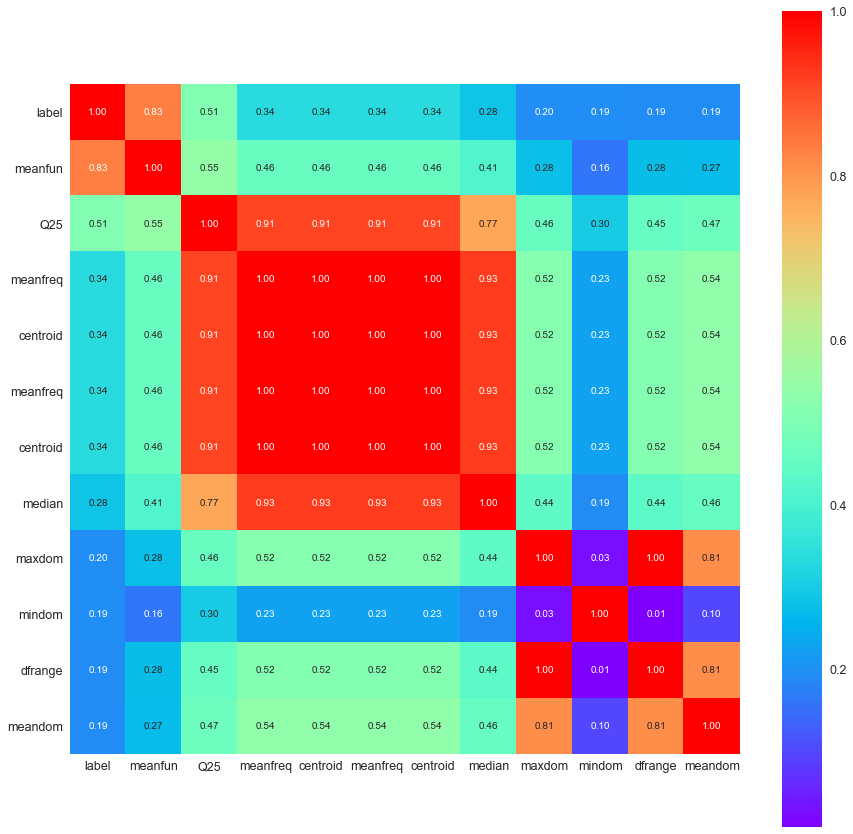

In [11]:
k = 10 #number of variables for heatmap
corrmat = df_full.corr()
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(df_full[cols].values.T)

plt.figure(figsize=(15,15)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')
plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


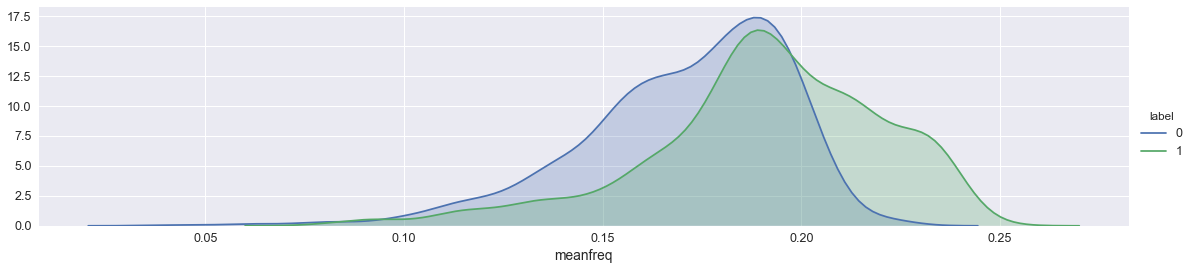

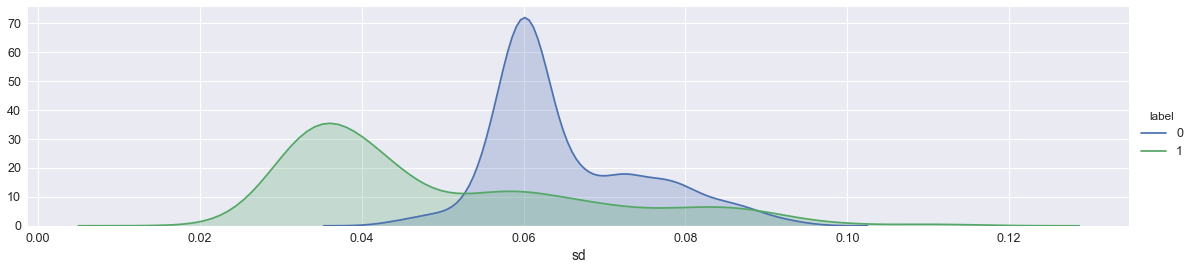

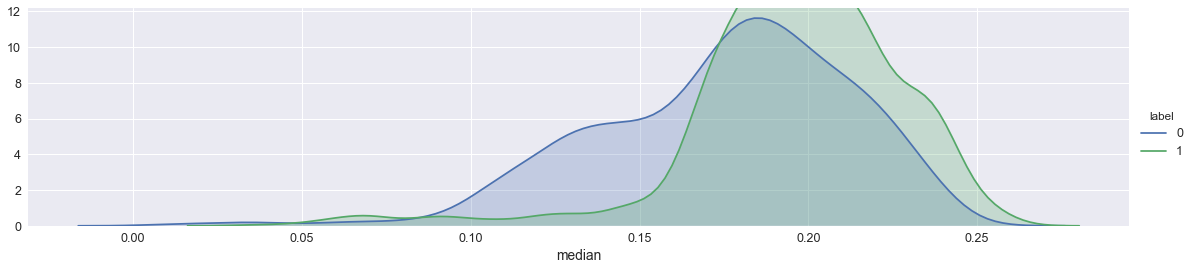

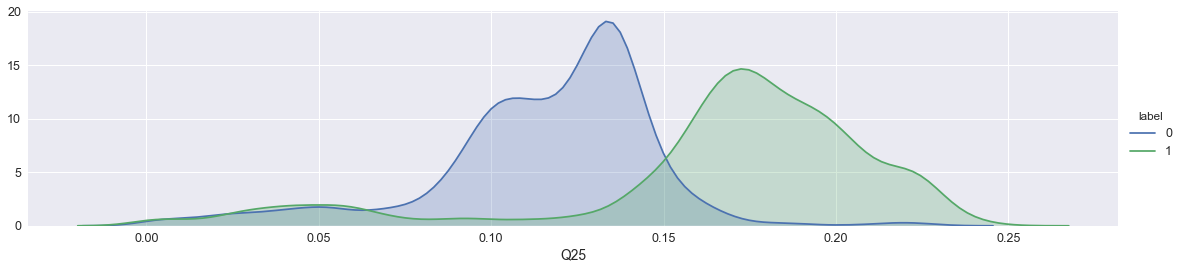

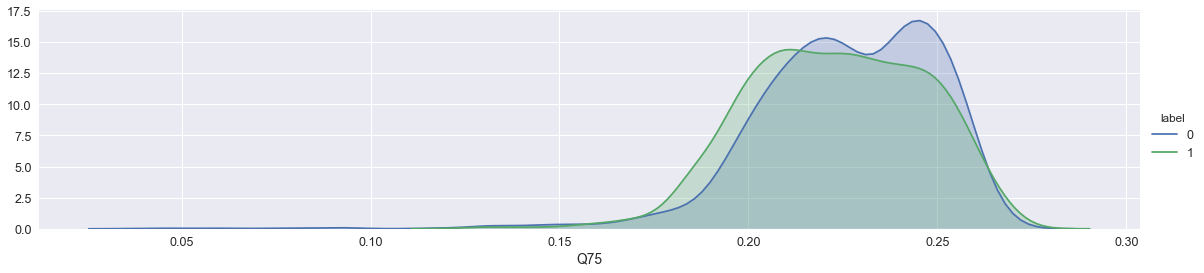

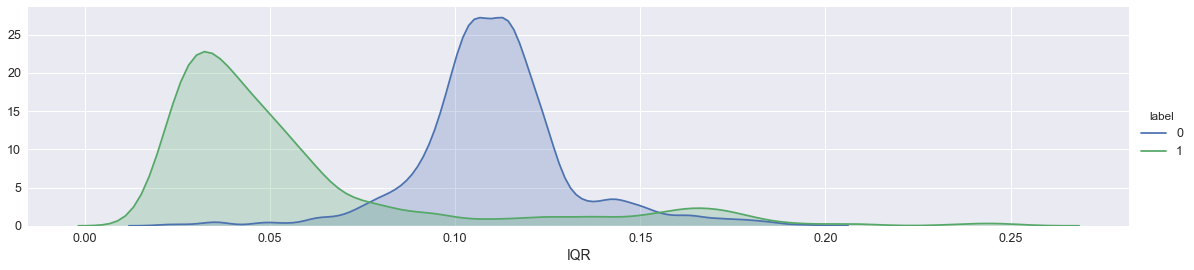

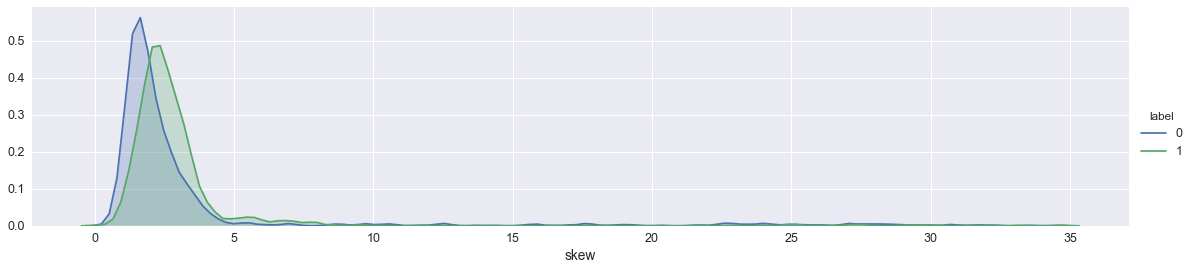

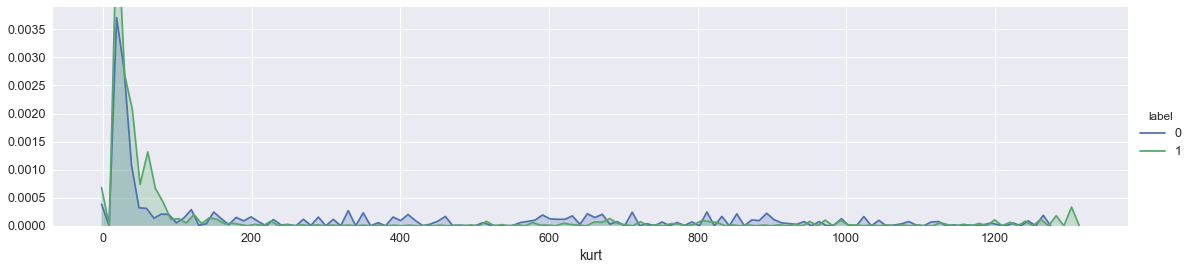

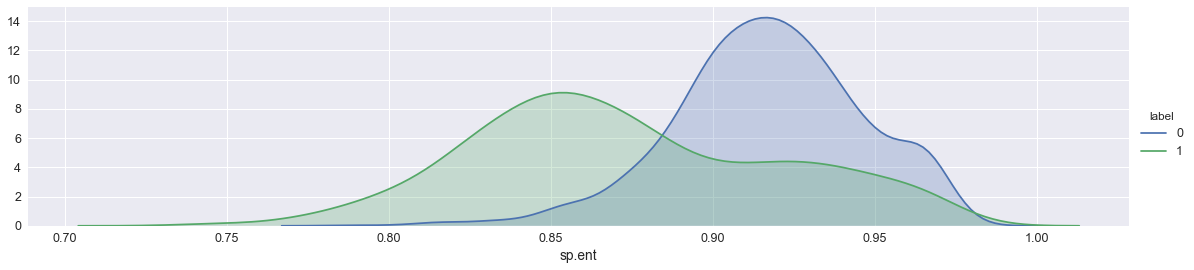

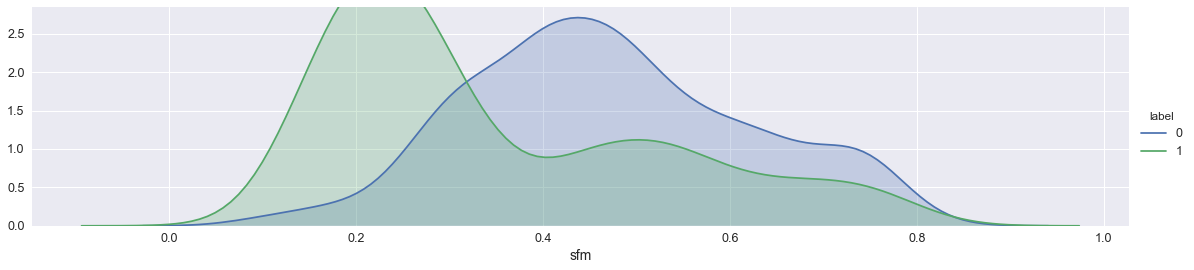

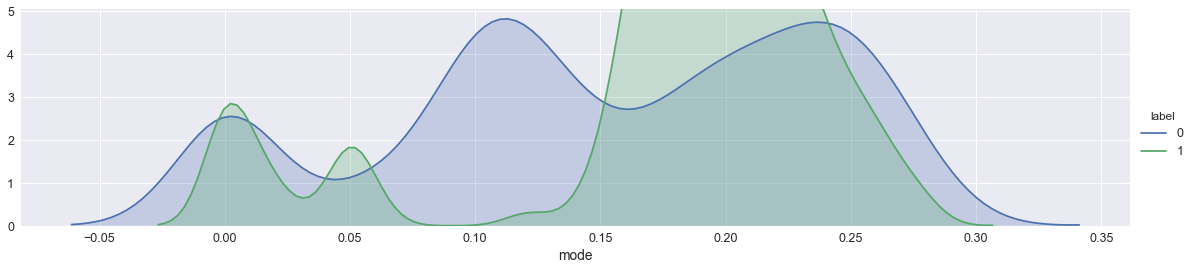

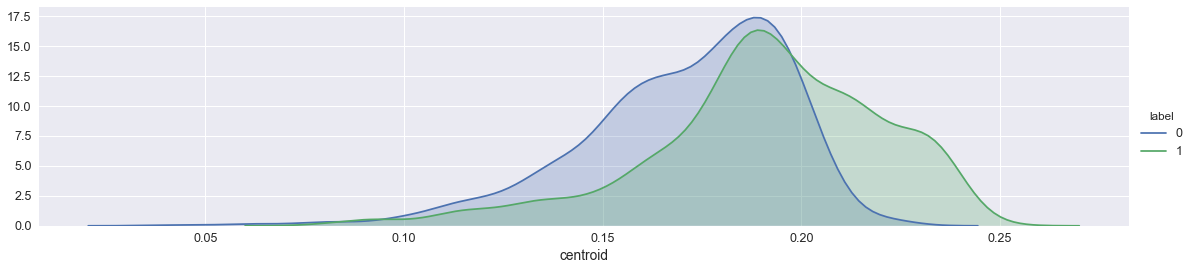

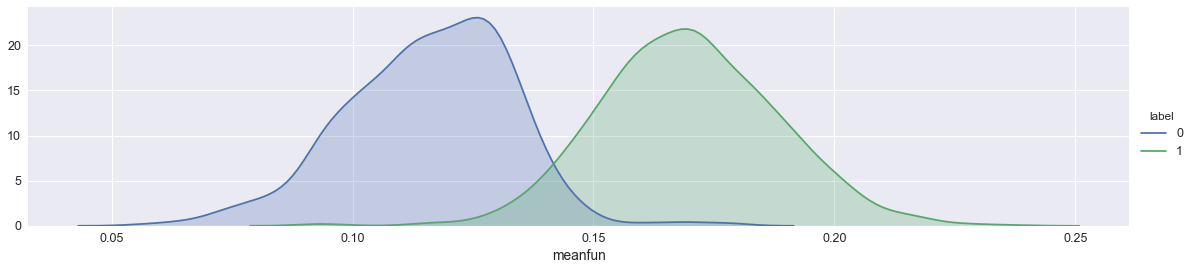

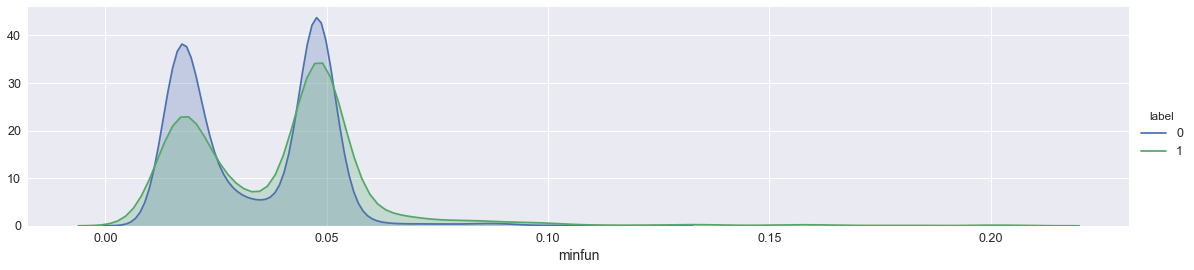

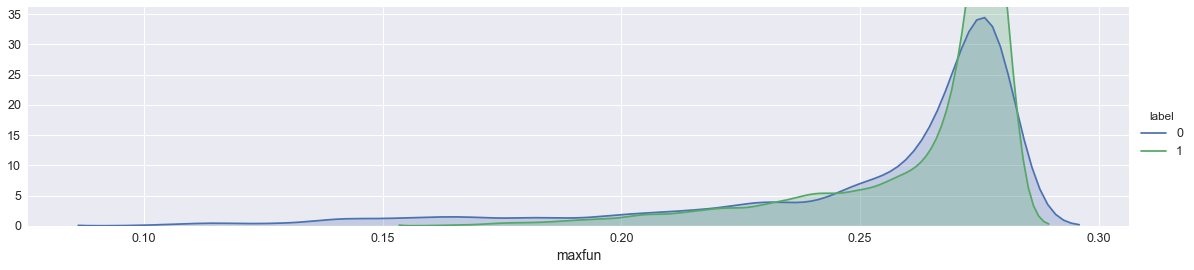

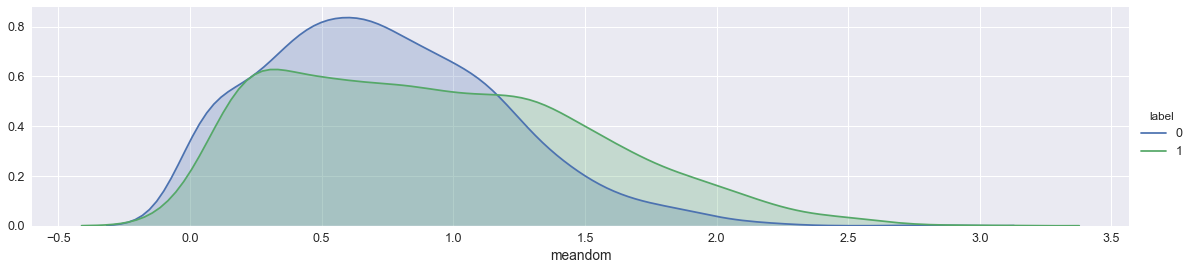

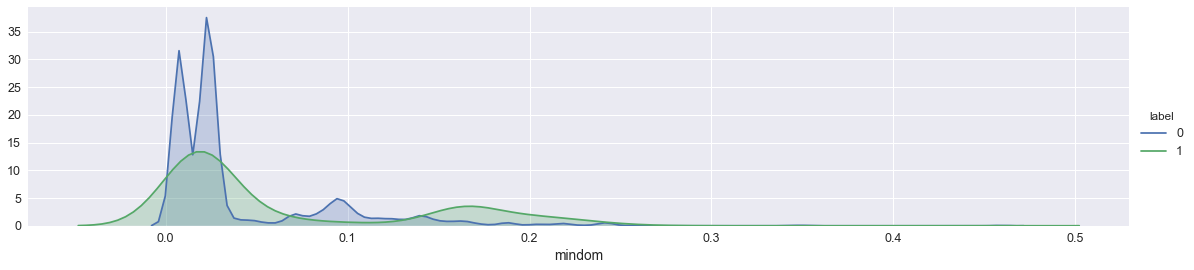

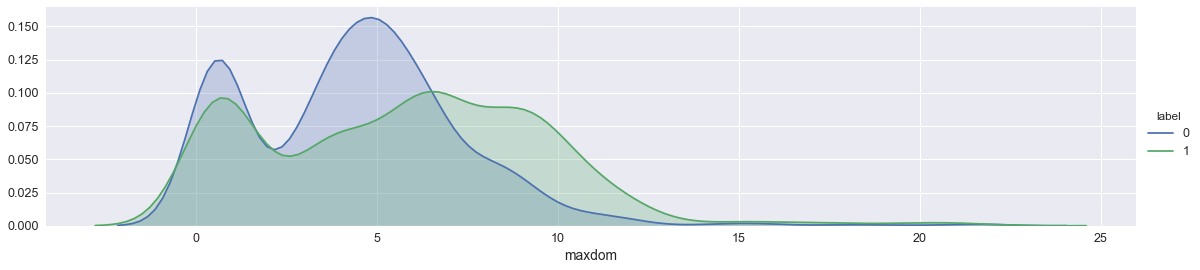

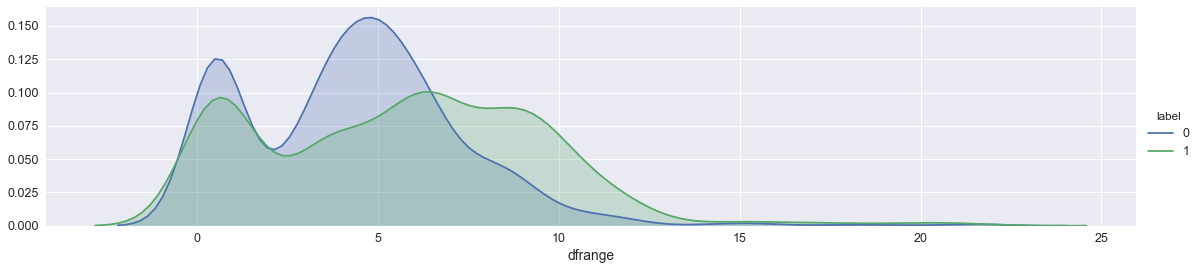

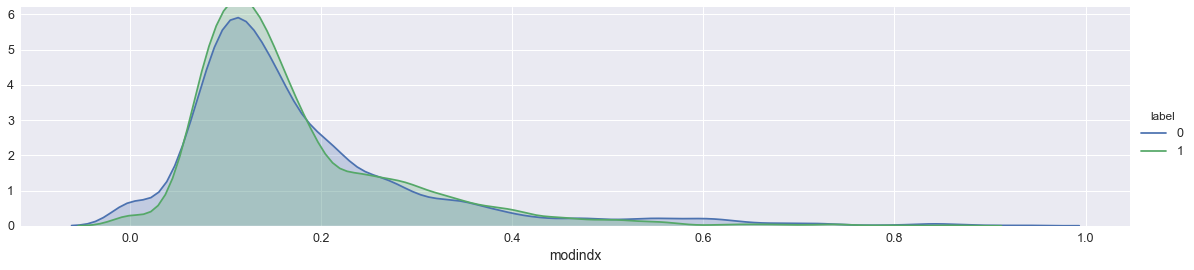

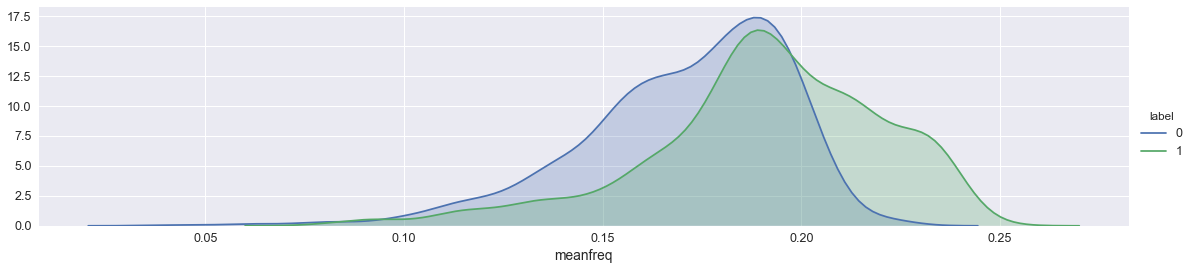

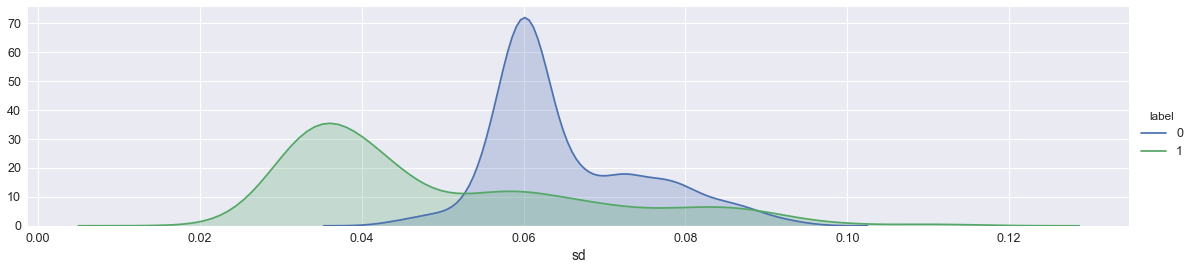

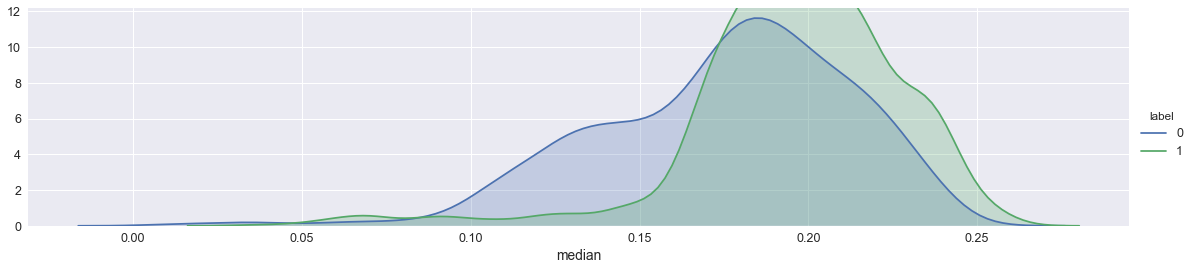

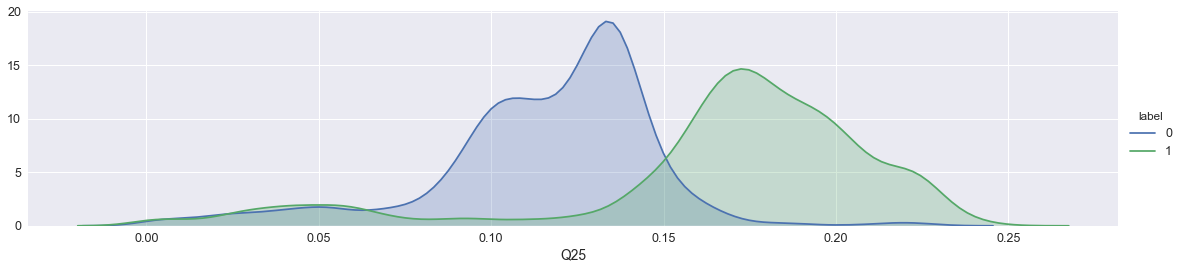

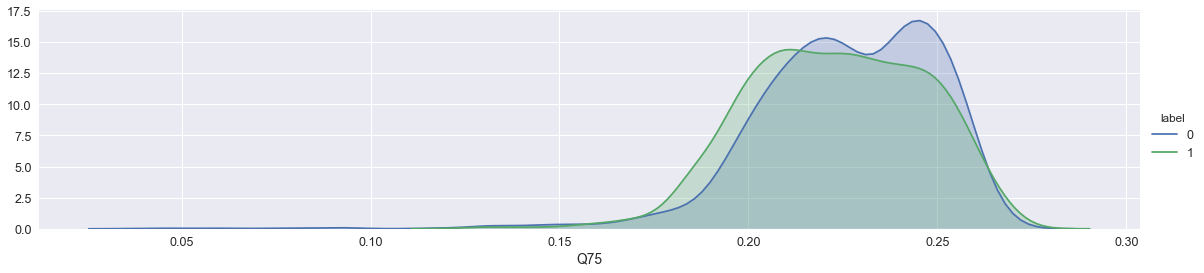

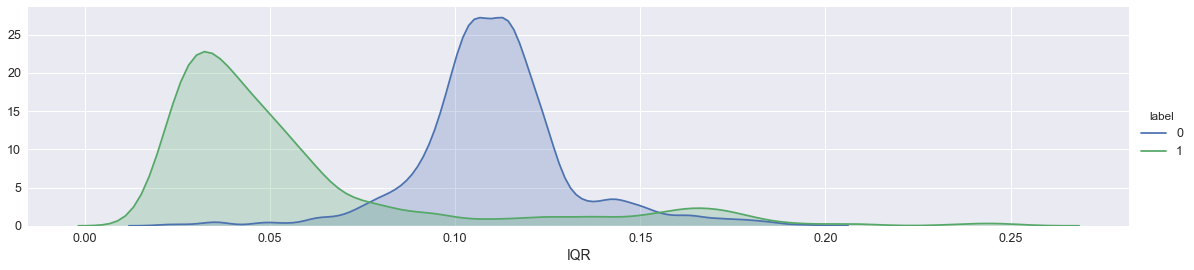

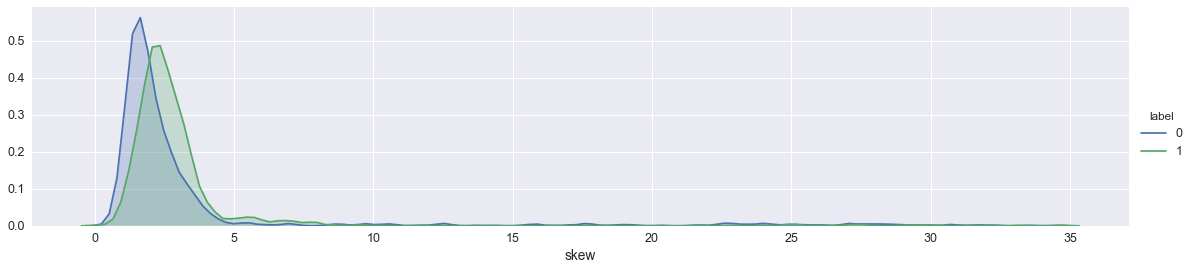

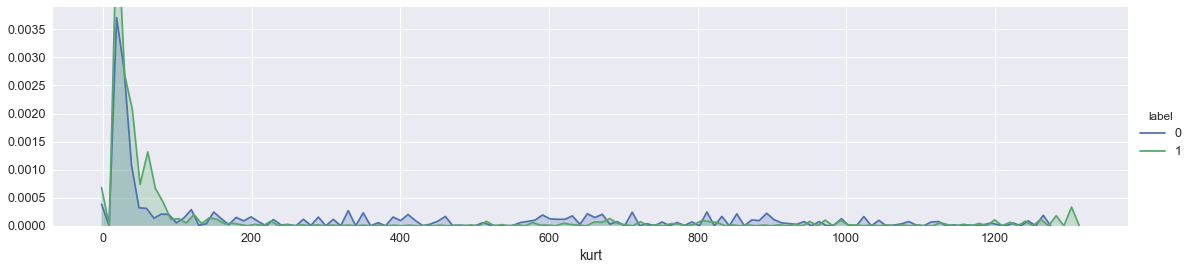

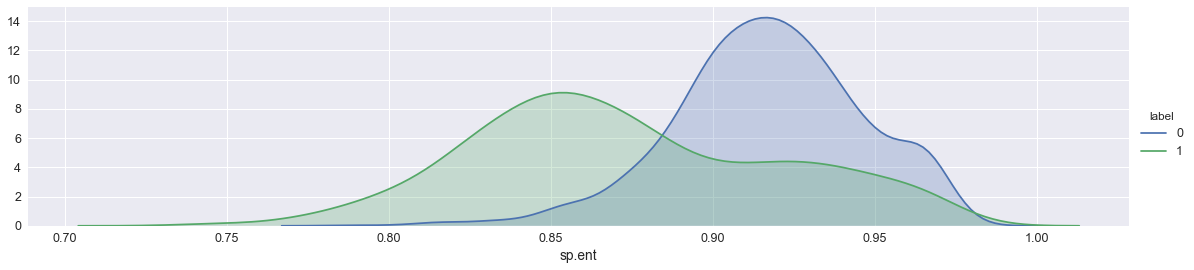

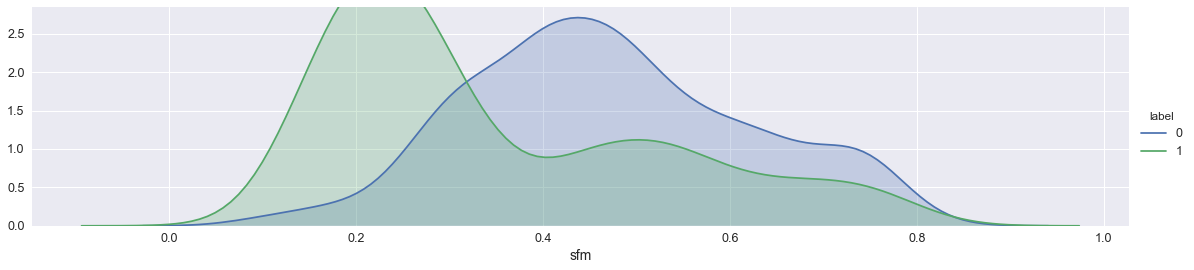

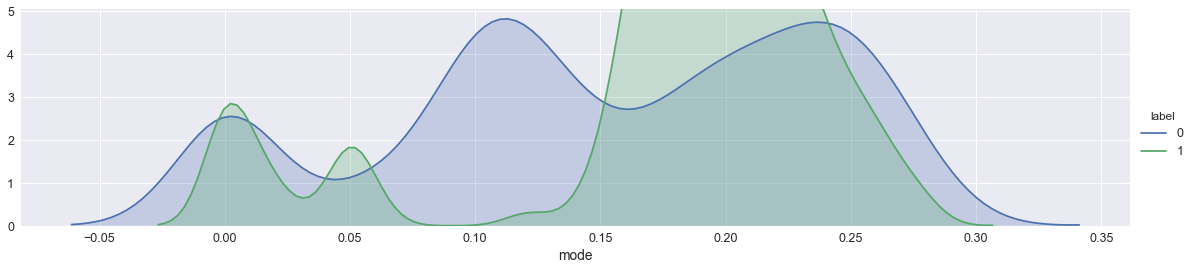

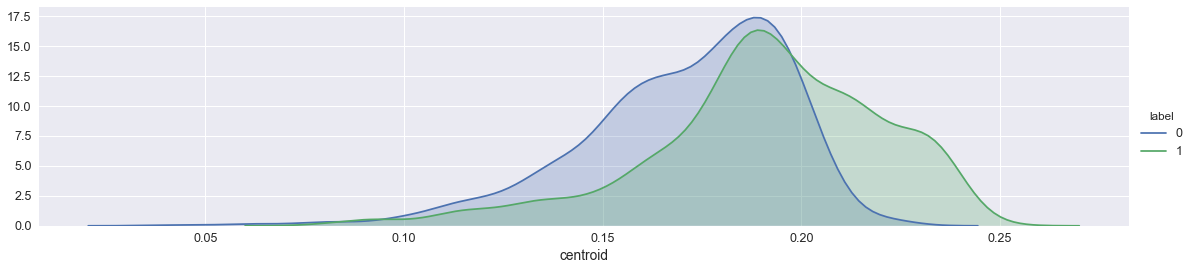

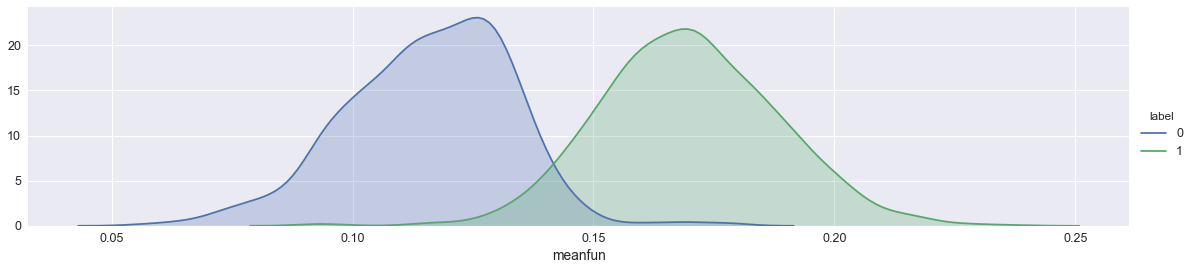

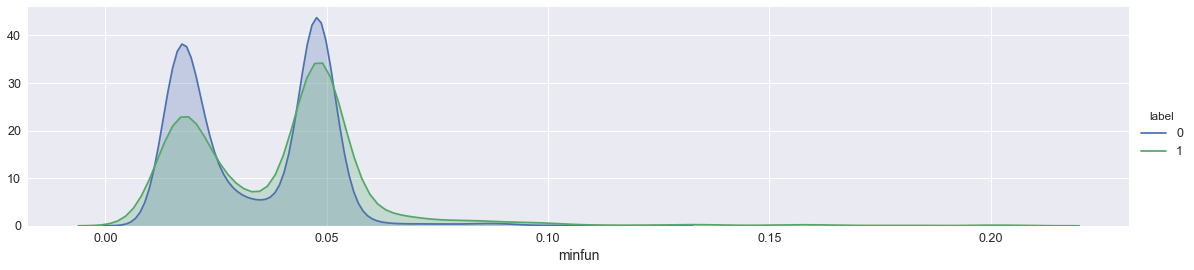

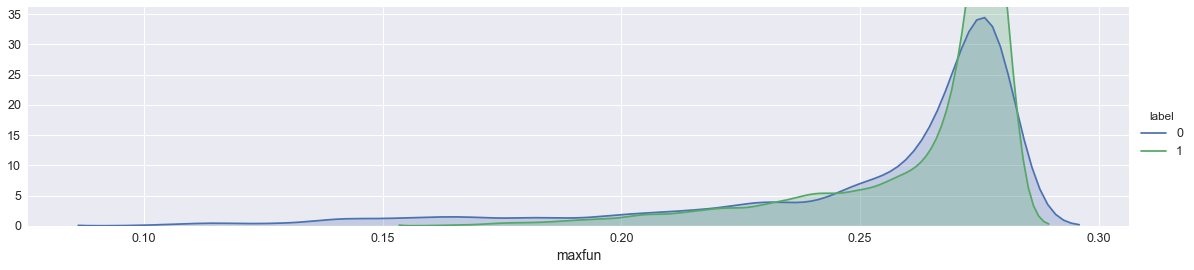

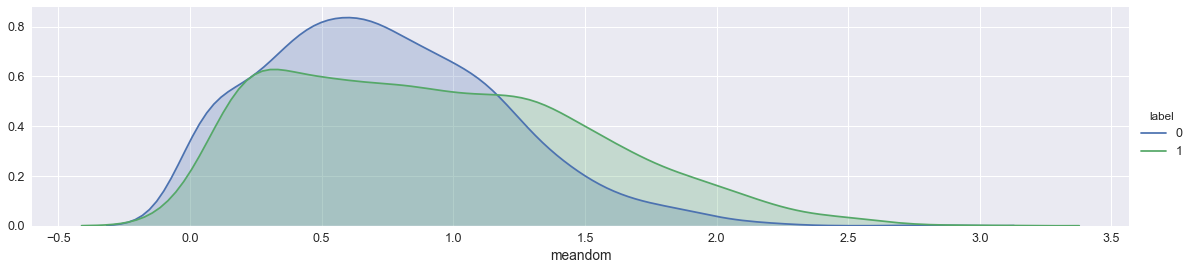

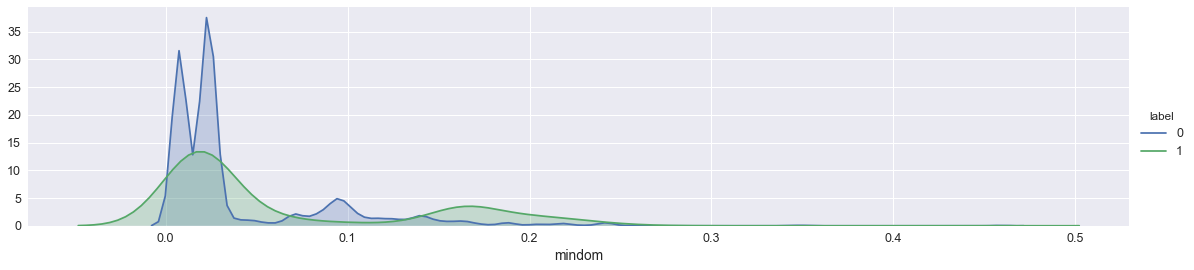

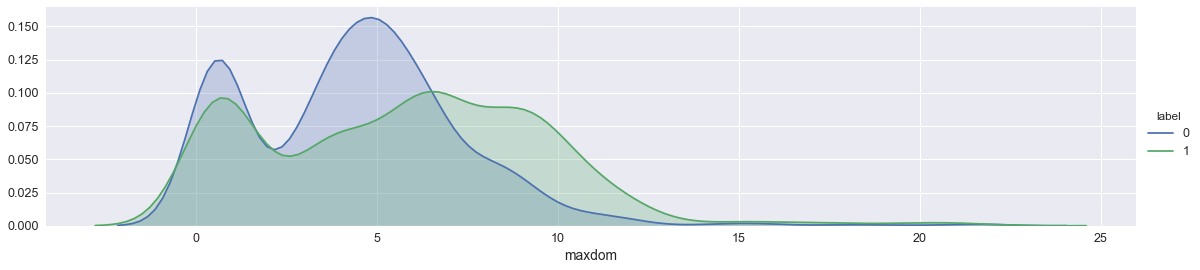

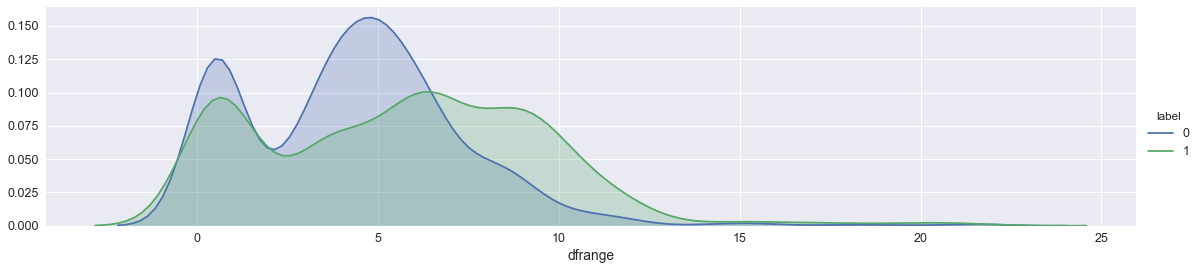

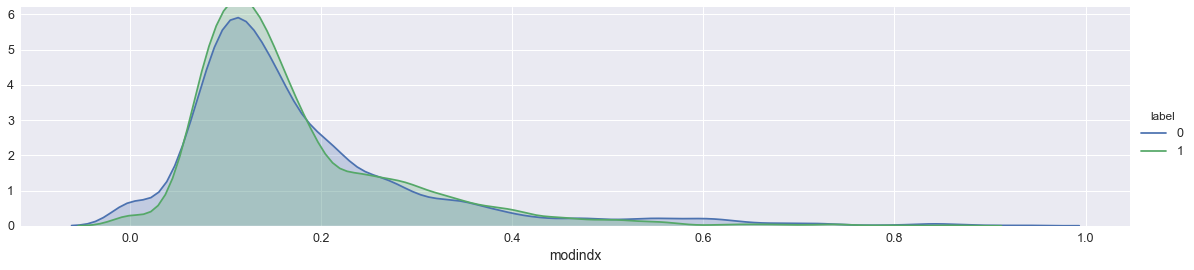

In [15]:
cols = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

for col in cols:
    facet = sns.FacetGrid(df_full, hue='label', aspect=4, size=4)
    facet.map(sns.kdeplot, col ,shade= True)
    facet.set()
    facet.add_legend()
    plt.show()

# data preprocessing

In [17]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_full, random_state=42)

df_label = shuffle_df['label']
df_feature = shuffle_df.drop('label', axis=1)

cut_point = round(len(df_full)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

In [18]:
scaler = MinMaxScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

# Keras: MLP 效果不錯

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               4200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
None
Train on 380 samples, validate on 1521 samples
Epoch 1/300
380/380 [==============================] - 0s - loss: 0.6931 - acc: 0.5395

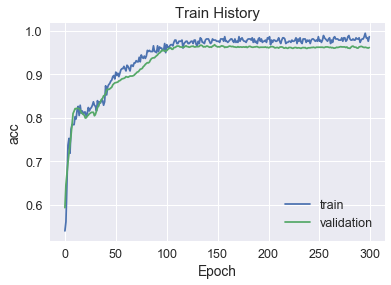

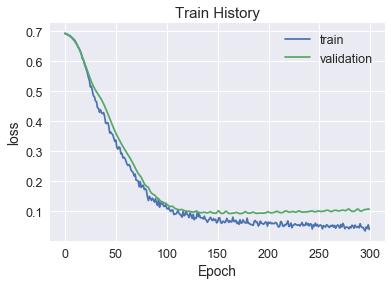

 640/1267 [==============>...............] - ETA: 0s

accuracy= 0.97000789266
  32/1267 [..............................] - ETA: 1s

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() 
model.add(Dense(units=200, 
                input_dim=20, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=300, 
                          batch_size=2000, verbose=1) #verbose=2表示顯示訓練過程

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)
#model.save_weights("Keras_VoiceGender_MLP.h5")
#print('model saved to disk')

In [20]:
prediction2 = prediction
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       624
          1       0.97      0.97      0.97       643

avg / total       0.97      0.97      0.97      1267

[[608  16]
 [ 22 621]]


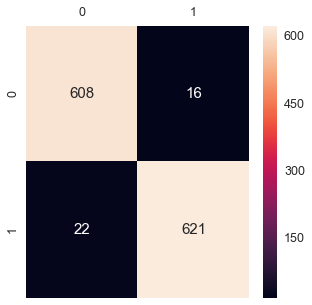

In [23]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

In [24]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  1267
G1P1:  608
G0P1:  16
G1P0:  22
G0P0:  621
##########################
sensitivity:  0.965079365079
specificity:  0.965785381026
false_positive_rate:  0.0251177394035
false_negative_rate:  0.0349206349206


(1267,
 0.96507936507936509,
 0.96578538102643852,
 0.025117739403453691,
 0.034920634920634921)

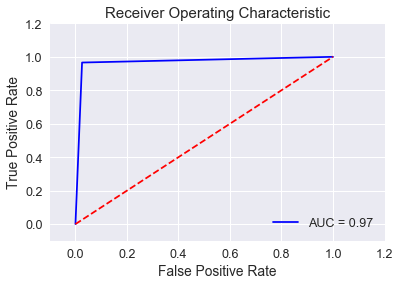

In [27]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Scikit-learn: RandomForestClassifier，比MLP還要好

In [42]:
# Scikit-learn models
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.993688
Testing Score:0.979479


In [43]:
prediction2 = clf.predict(test_feature_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       624
          1       0.99      0.97      0.98       643

avg / total       0.98      0.98      0.98      1267

[[616   8]
 [ 18 625]]


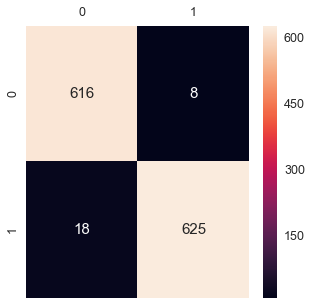

In [44]:
# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

In [45]:
# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  1267
G1P1:  616
G0P1:  8
G1P0:  18
G0P0:  625
##########################
sensitivity:  0.971608832808
specificity:  0.97200622084
false_positive_rate:  0.0126382306477
false_negative_rate:  0.0283911671924


(1267,
 0.97160883280757093,
 0.97200622083981336,
 0.012638230647709321,
 0.028391167192429023)

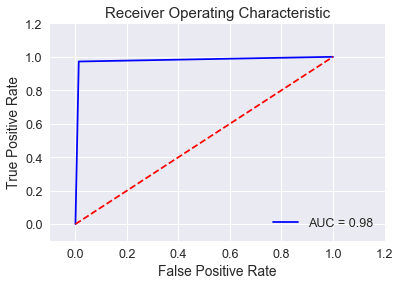

In [46]:
# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PCA降低維度測試，效果變差一些

In [90]:
pca = PCA(n_components=10)
pca.fit(train_feature_trans)
pca_score = pca.explained_variance_ratio_
pca_score

array([ 0.5096875 ,  0.11779022,  0.08727398,  0.0626329 ,  0.05316123,
        0.03776423,  0.0328923 ,  0.0252862 ,  0.02254116,  0.0172489 ])

In [91]:
train_feature_trans_PCA = pca.transform(train_feature_trans)
test_feature_trans_PCA = pca.transform(test_feature_trans)

In [92]:
# Scikit-learn models
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans_PCA,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans_PCA,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans_PCA,test_label))

Traing Score:0.988427
Testing Score:0.959747


In [93]:
prediction2 = clf.predict(test_feature_trans_PCA)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       624
          1       0.98      0.94      0.96       643

avg / total       0.96      0.96      0.96      1267

[[613  11]
 [ 40 603]]


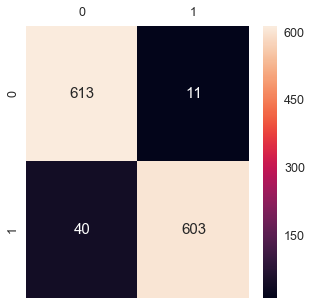

In [96]:
# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

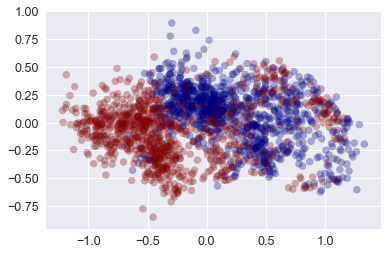

In [97]:
plt.scatter(train_feature_trans_PCA[:,0],train_feature_trans_PCA[:,1], alpha=0.3, 
            c=train_label , cmap=cm.jet, vmin=0., vmax=1.)
plt.show()

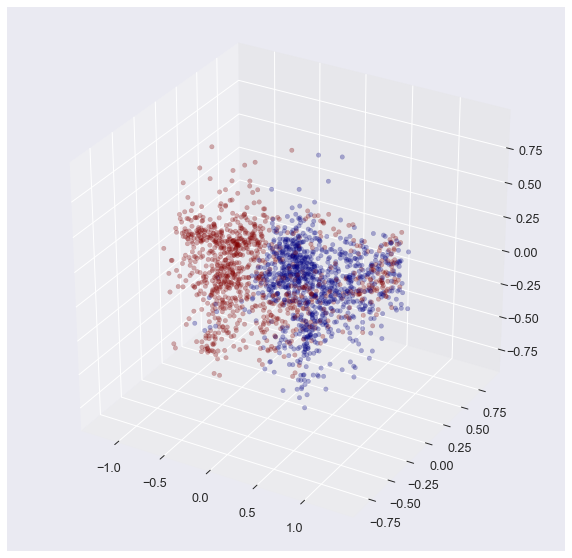

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_feature_trans_PCA[:,0],train_feature_trans_PCA[:,1], train_feature_trans_PCA[:,2], alpha=0.3, 
               c=train_label , cmap=cm.jet, vmin=0., vmax=1.)
plt.show()